In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#dataset loading
df=pd.read_csv('WineQT.csv')

#ensure dataset leaded corretly
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

Shape of data: (1143, 13)
Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


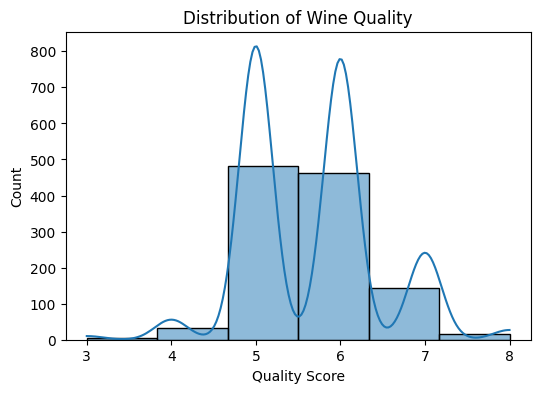

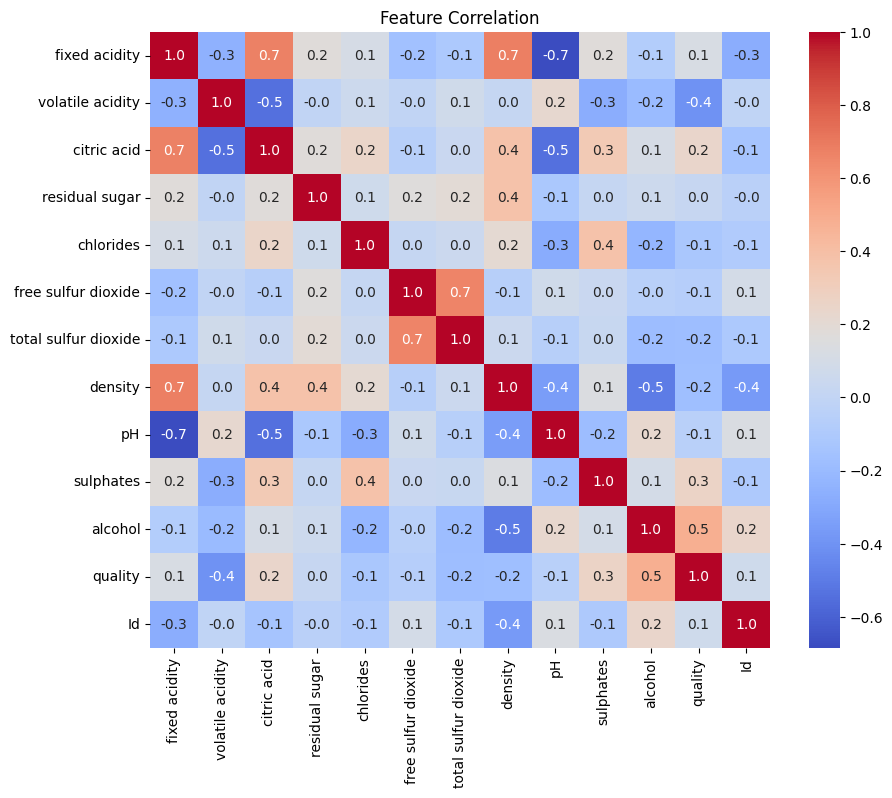

In [ ]:
#checking data size
print(f"Shape of data: {df.shape}")

#checking for missing values
print(f"Missing values:\n{df.isnull().sum()}")

#Plot:     Quality distribution
plt.figure(figsize=(6,4))
sns.histplot(df['quality'],kde=True,bins=6)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.show()

#plot:    Correlation heat map
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".1f")
plt.title('Feature Correlation')
plt.show()

In [4]:
#seperate features(x) and target(y)
#quality is dropped because it is target
#'ID' is dropped because it doesnt have an impact in the target
X=df.drop(['quality','Id'],axis=1)
y=df['quality']

#splitting data
#test_size=0.2, 20% saved for testing
#random_state=42, ensures reproducability gets same random split every time
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Training shapes: X={X_train.shape},y={y_train.shape}")
print(f"Testing shapes: X={X_test.shape},y={y_test.shape}")

Training shapes: X=(914, 11),y=(914,)
Testing shapes: X=(229, 11),y=(229,)


In [5]:
#training
model = LinearRegression()
model.fit(X_train, y_train)

#predictions
predictions = model.predict(X_test)

# 3. Grading (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

#Comparing actual vs predicted for the first 5 wines
comparison = pd.DataFrame({'Actual': y_test.values[:5], 'Predicted': predictions[:5]})
print(comparison)

Root Mean Squared Error (RMSE): 0.6165
   Actual  Predicted
0       5   5.376391
1       6   4.812752
2       5   5.268227
3       6   5.088265
4       6   6.096687
